<a href="https://colab.research.google.com/github/RushilPatel0703/DAE_Project/blob/main/DAE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethereum Fraud Detection

Sections:

- Housekeeping and Imports
- Data Loading
- Data Exploration
- Data Cleaning
- Feature Engineering
- Data Transformation and Preparation
- Model Exploration and Performance Analysis
- Final Model Building
 

## Housekeeping and Imports

For importing libraries necessary for the project, and for basic preprocessing functions. 

We're going to import commonly used Data Science libraries

In [24]:
## IMPORT REQUIRED PYTHON LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from scipy import stats


## Data Loading

For loading data files into appropriate variables.

In [3]:
## DOWNLOAD DATA AND READ IT WITH PANDAS
url1 = 'https://raw.githubusercontent.com/RushilPatel0703/DAE_Project/main/eth_illicit_features.csv'
data_1 = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/RushilPatel0703/DAE_Project/main/transaction_dataset.csv'
data_2 = pd.read_csv(url2)
pd.reset_option('max_rows')

## Data Exploration

Section for **exploratory analysis** on the available data. 

The exploration techniques vary for numerical, categorical, or time-series variables. Currently, 

Here we typically:

- look at example records in the dataset
- Merging datasets, keeping features that are present in both datasets
- investigate the datatypes of variables in the dataset
- calculate and investigate descriptive statistics (ex: central tendencies, variability etc.)
- investigate distribution of feature vectors (ex: to check for skewness and outliers)
- investigate distribution of prediction vector
- check out the relationship (ex: correlation) between different features
- check out the relationship between feature vectors and prediction vector

Common steps to check the health of the data:

- Check for missing data
- Check the skewness of the data, outlier detection
- etc...

### Look at Example Records

In [4]:
data_1.head()

,address,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788


In [6]:
data_2.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### Merging datasets, keeping features that are present in both datasets

In [7]:
# DROPPING COLUMNS NOT IN COMMON WITH data_2
data_1.drop(['minTimeBetweenSentTnx', 'maxTimeBetweenSentTnx', 'minTimeBetweenRecTnx', 'maxTimeBetweenRecTnx', 'lifetime', 'activityDays',
       'dailyMax', 'ratioRecSent', 'ratioSentTotal', 'ratioRecTotal',
       'giniSent', 'giniRec', 'txFreq', 'stdBalanceEth'], inplace=True, axis=1)

In [8]:
data_1.columns

Index(['address', 'flag', 'avgTimeBetweenSentTnx', 'avgTimeBetweenRecTnx',
       'sentTransactions', 'receivedTransactions', 'createdContracts',
       'numUniqSentAddress', 'numUniqRecAddress', 'minValSent', 'maxValSent',
       'avgValSent', 'minValReceived', 'maxValReceived', 'avgValReceived',
       'totalTransactions', 'totalEtherSent', 'totalEtherReceived',
       'totalEtherSentContracts', 'totalEtherBalance'],
      dtype='object')

In [9]:
# DROPPING COLUMNS NOT IN COMMON WITH  data_1
data_2.drop(['Unnamed: 0', 'Index', 'Time Diff between first and last (Mins)',
       'min value sent to contract', 'max val sent to contract', 'avg value sent to contract',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val rec',
       ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent',
       ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type'], inplace=True, axis=1)

In [10]:
data_2.columns

Index(['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance'],
      dtype='object')

In [11]:
# RENAMING COLUMNS TO COLUMN NAMES IN data_1 FOR EASE OF
data_2.rename(columns= {'Address':'address', 'FLAG':'flag', 'Avg min between sent tnx':'avgTimeBetweenSentTnx',
                        'Avg min between received tnx':'avgTimeBetweenRecTnx', 'Sent tnx':'sentTransactions',
                        'Received Tnx':'receivedTransactions', 'Number of Created Contracts':'createdContracts',
                        'Unique Received From Addresses':'numUniqRecAddress', 'Unique Sent To Addresses':'numUniqSentAddress',
                        'min value received':'minValReceived','max value received ':'maxValReceived',
                        'avg val received':'avgValReceived', 'min val sent':'minValSent', 'max val sent':'maxValSent',
                        'avg val sent': 'avgValSent', 'total transactions (including tnx to create contract':'totalTransactions',
                        'total Ether sent':'totalEtherSent', 'total ether received':'totalEtherReceived',
                        'total ether sent contracts':'totalEtherSentContracts', 'total ether balance':'totalEtherBalance'}, inplace=True)

In [12]:
df = pd.concat([data_1, data_2]) # COMBINE data_1 AND data_2

### Data-types, completeness Information

Using the Pandas "info" function, in addition to the data-type information for the dataset, we can look at counts of available records/missing records too.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21987 entries, 0 to 9840
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  21987 non-null  object 
 1   flag                     21987 non-null  int64  
 2   avgTimeBetweenSentTnx    21987 non-null  float64
 3   avgTimeBetweenRecTnx     21987 non-null  float64
 4   sentTransactions         21987 non-null  int64  
 5   receivedTransactions     21987 non-null  int64  
 6   createdContracts         21987 non-null  int64  
 7   numUniqSentAddress       21987 non-null  int64  
 8   numUniqRecAddress        21987 non-null  int64  
 9   minValSent               21987 non-null  float64
 10  maxValSent               21987 non-null  float64
 11  avgValSent               21987 non-null  float64
 12  minValReceived           21987 non-null  float64
 13  maxValReceived           21987 non-null  float64
 14  avgValReceived         

In [14]:
df.isnull().sum() # LOOK IF THERE IS ANY MISSING VALUES

address                    0
flag                       0
avgTimeBetweenSentTnx      0
avgTimeBetweenRecTnx       0
sentTransactions           0
receivedTransactions       0
createdContracts           0
numUniqSentAddress         0
numUniqRecAddress          0
minValSent                 0
maxValSent                 0
avgValSent                 0
minValReceived             0
maxValReceived             0
avgValReceived             0
totalTransactions          0
totalEtherSent             0
totalEtherReceived         0
totalEtherSentContracts    0
totalEtherBalance          0
dtype: int64

### Descriptive Statistics

In [15]:
df.describe()
# Additonal: 
#     We can also make a guess at the skewness of the data at this stage by looking at the difference between
#     the means and medians of numerical features

,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
count,21987.000000,2.198700e+04,2.198700e+04,21987.000000,21987.000000,21987.000000,21987.000000,21987.000000,21987.000000,21987.000000,21987.000000,21987.000000,21987.000000,21987.000000,21987.000000,2.198700e+04,2.198700e+04,21987.000000,2.198700e+04
mean,0.333333,2.017807e+06,8.849104e+07,337.691409,448.022786,2.641788,66.613408,167.290535,5.603368,233.015954,26.741914,27.203154,380.656260,73.831433,788.355983,6.238740e+03,6.824447e+03,0.002042,5.857052e+02
std,0.471415,3.068441e+07,1.905694e+08,1496.171520,1807.664973,122.922835,496.873942,868.424851,206.194426,6315.603885,272.599897,427.784109,10626.929063,2767.424229,2405.265091,2.494383e+05,2.475040e+05,0.263258,1.694017e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07
25%,0.000000,0.000000e+00,1.020000e+00,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.048303,0.008546,0.000000,0.300000,0.099454,4.000000,7.312695e-02,8.111346e-01,0.000000,0.000000e+00
50%,0.000000,2.171600e+02,1.033698e+04,3.000000,8.000000,0.000000,2.000000,3.000000,0.000000,1.991536,0.440000,0.011846,2.000000,0.624387,18.000000,5.167382e+00,8.870386e+00,0.000000,1.638000e-03
75%,1.000000,3.269873e+04,6.604927e+07,32.000000,42.000000,0.000000,8.000000,10.000000,0.439608,17.409571,4.512919,0.300000,14.934265,3.322822,133.000000,6.222540e+01,7.798907e+01,0.000000,4.201412e-02
max,1.000000,8.291299e+08,8.309932e+08,10000.000000,10000.000000,9995.000000,9950.000000,9999.000000,25533.614329,611102.014456,25533.614329,25533.614518,800000.000000,283618.831600,19995.000000,2.858096e+07,2.858159e+07,39.000000,1.428864e+07


In [16]:
df.duplicated().sum() # LOOK FOR ANY DUPLICATES IN DATA

125

In [17]:
df.drop_duplicates(inplace=True) # REMOVING DUPLICATES
df.duplicated().sum()

0

### Visualizaton: Distribution of features

Visualization techniques differ depending on the type of the feature vector (i.e. numerical: continuous or discrete, categorical: ordinal etc). Techniques will also depend on the type of data being dealt with, and the insight that we want to extract from it. 

Common visualization techniques include:
- Bar Plots: Visualize the frequency distribution of categorical features.
- Histograms: Visualize the frequency distribution of numerical features.
- Box Plots: Visualize a numerical feature, while providing more information like the median, lower/upper quantiles etc..
- Scatter Plots: Visualize the relationship (usually the correlation) between two features. Can include a goodness of fit line, to serve as a regression plot.

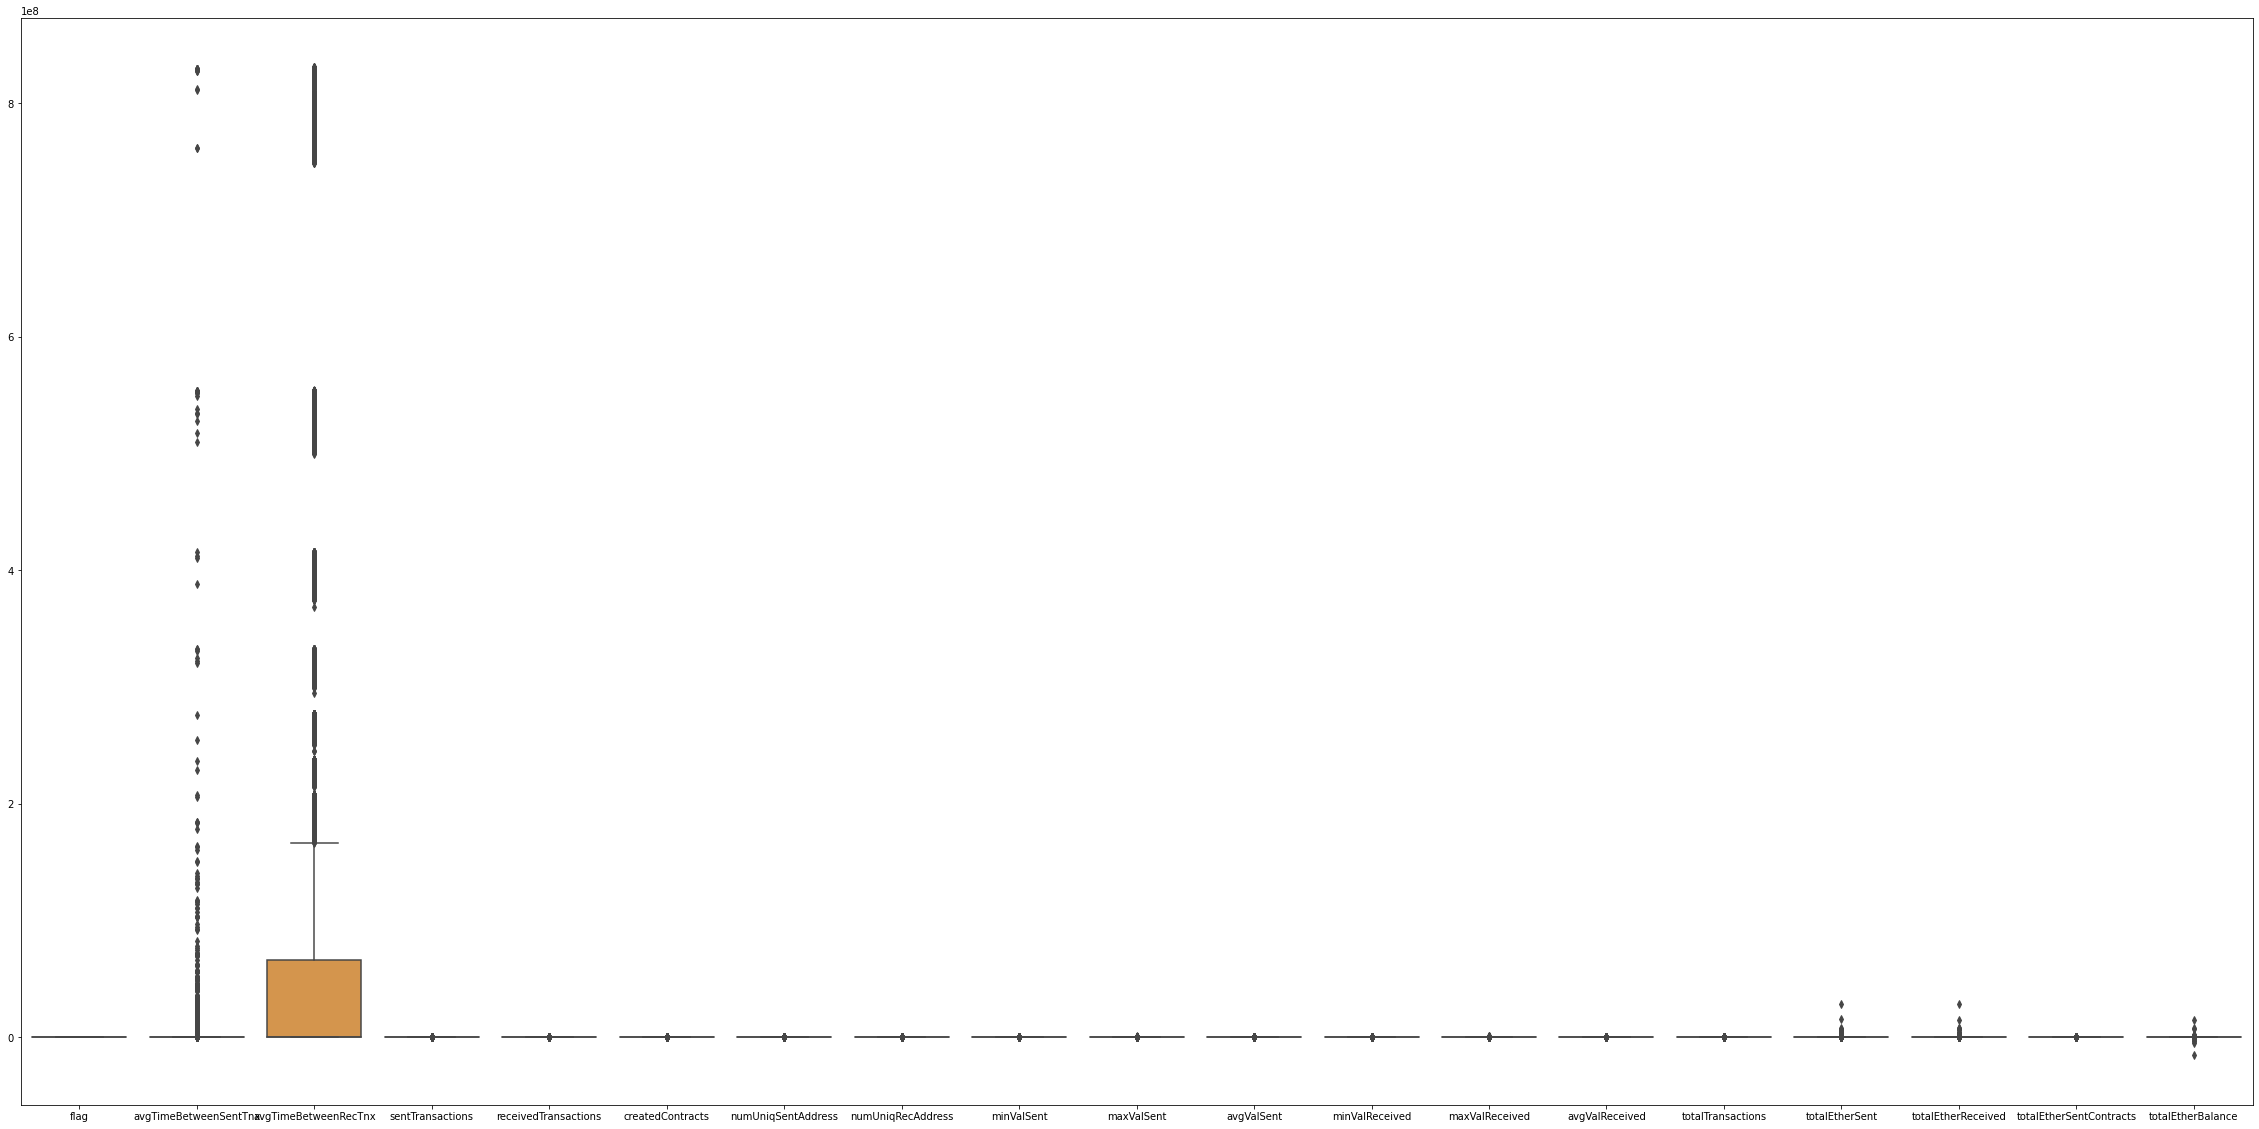

In [18]:
# PLOT FEATURES TO SEE THE OUTLIERS
plt.figure(figsize=(40, 20))
sns.boxplot(data=df)

### Visualizing prediction vector

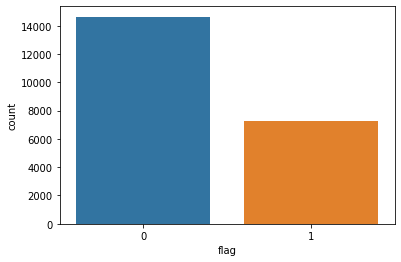

In [19]:
sns.countplot(x="flag", data=df) # We notice a bias in our dataset where there are more samples with no fraud then frauds(imbalance in predictive class)

### Hypothesis Testing

In [22]:
def hyp_test(col1, col2, df, alpha):

  fraud_sample = np.array([np.mean(df[df[col1]==1].sample(20)[col2].values) for i in range(500)])
  no_fraud_sample = np.array([np.mean(df[df[col1]==0].sample(20)[col2].values) for i in range(500)])

  effect = np.mean(fraud_sample) - np.mean(no_fraud_sample)
  sigma_first = np.std(fraud_sample)
  sigma_second = np.std(no_fraud_sample)
  sigma_difference = np.sqrt((sigma_first**2)/len(fraud_sample)  +  (sigma_second**2)/len(no_fraud_sample))
  z_score = effect / sigma_difference # getting z-score

  p_value = stats.norm.sf(abs(z_score))*2 # getting p-value

  if p_value > alpha:
    print("We fail to reject Null hypothesis")
  elif p_value <= alpha:
    print("We reject null hypothesis")

**H0**: Fradulent transactions are independent of average times between transactions recieved

**H1**: Fradulent transactions are dependent of average times between transactions recieved

$\alpha$ = 0.05

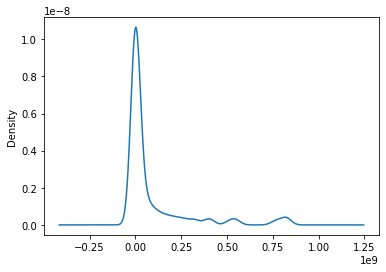

In [20]:
df['avgTimeBetweenRecTnx'].plot(kind='kde') #Check distribution of average times

In [25]:
alpha = 0.05
hyp_test('flag', 'avgTimeBetweenRecTnx', df, alpha =0.05)

We reject null hypothesis


**H0**: Fradulent transactions are independent of amount of Ether sent

**H1**: Fradulent transactions are dependent on amount of Ether sent

$\alpha$ = 0.05

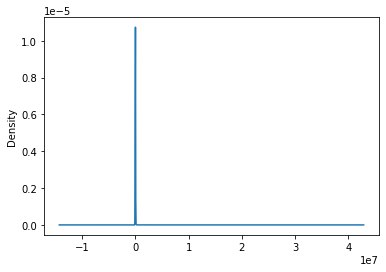

In [26]:
df['totalEtherSent'].plot(kind='kde') #Check distribution of total ether sent

In [27]:
alpha = 0.05
hyp_test('flag', 'totalEtherSent', df, alpha =0.05)

We reject null hypothesis


**H0**: Fradulent transactions are independent of Ether balance

**H1**: Fradulent transactions are dependent on Ether balance

$\alpha$ = 0.05

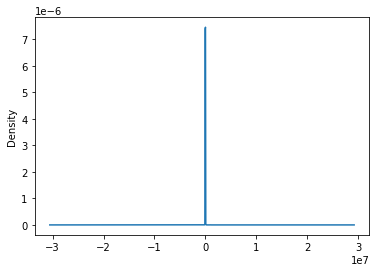

In [34]:
df['totalEtherBalance'].plot(kind='kde') #Check distribution of total ether balance

In [29]:
alpha = 0.05
hyp_test('flag', 'totalEtherBalance', df, alpha =0.05)

We fail to reject Null hypothesis


**H0**: Fradulent transactions are independent of total number of transactions made

**H1**: Fradulent transactions are dependent on total number of transactions made

$\alpha$ = 0.05

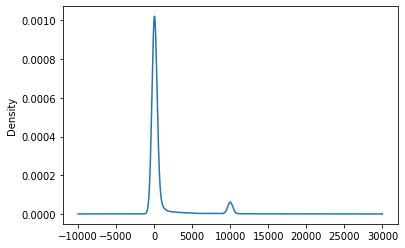

In [30]:
df['totalTransactions'].plot(kind='kde') #Check distribution of total transactions made

In [31]:
alpha = 0.05
hyp_test('flag', 'totalTransactions', df, alpha =0.05)

We reject null hypothesis


### Outlier Detection

The presence of outliers can often skew results which take into consideration these data points. 


In [ ]:
df.skew(axis = 0, skipna = True).sort_values() # CHECK THE SKEWNESS OF THE DATA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


totalEtherBalance           -3.218564
flag                         0.719930
avgTimeBetweenRecTnx         2.620069
totalTransactions            3.425968
receivedTransactions         4.673886
sentTransactions             5.568895
numUniqRecAddress            6.753592
numUniqSentAddress          12.528606
avgTimeBetweenSentTnx       21.763417
minValReceived              43.451106
avgValSent                  53.459817
maxValReceived              58.327570
createdContracts            63.004272
maxValSent                  73.548959
totalEtherReceived          83.881310
totalEtherSent              84.067256
avgValReceived              97.952199
minValSent                  98.741249
totalEtherSentContracts    147.452227
dtype: float64

## Data Transformation and Preparation

### Transforming Skewed Continous Features 

It is common practice to apply a logarthmic transformation to highly skewed continuous feature distributions. A typical flow for this is in a commented code block below.

In [ ]:
# SPLIT DATA TO PREPARE IT FOR THE DATA TRANSFORMATION
X = df.drop('flag',axis=1)
y = df['flag']

df2 = X.copy()
from scipy import stats

# BOX COX DATA TRANSFORMATION TO HANDLE SKEWED DATA(IT TRANSFORMS DATA TO HAVE BETTER DISTRIBUTION)
# makes a better distribution of the data so that outliers have minimal impact on our ml model
# we only transform features that are numerical , not categorical

for col in df2:
  if df2[col].dtypes == 'int64' or df2[col].dtypes == 'float64':
    posdata = df2[col][df2[col] > 0]
    col_data, fitted_lambda = stats.boxcox(posdata)
    df2.loc[df2[col] > 0, col] = col_data
df_final = df2.copy()

In [ ]:
df_final.skew(axis = 0, skipna = True).sort_values()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


totalEtherBalance         -113.841353
totalEtherSentContracts    -32.452553
minValSent                  -0.714737
minValReceived              -0.492611
avgValReceived               0.023142
avgValSent                   0.029651
maxValReceived               0.074183
totalTransactions            0.094538
totalEtherReceived           0.159352
avgTimeBetweenRecTnx         0.171635
receivedTransactions         0.191791
numUniqRecAddress            0.261355
maxValSent                   0.318413
avgTimeBetweenSentTnx        0.337046
sentTransactions             0.466997
totalEtherSent               0.499708
numUniqSentAddress           0.560156
createdContracts             9.983197
dtype: float64

We can see that we get less skewed data after applying boxcox, with only 3 features that are still skew compared to 18 skewed features before transforming

### Normalizing Numerical Features 

Another common practice is to perform some type of scaling on numerical features. Applying scaling doesn't change the shape of each feature's distribution; but ensures that each feature is treated equally when applying supervised learners.

In [ ]:
# we standardize the data with StandardScaler we basically just does z = (x-mean)/standard deviation
df_final = df_final.drop('address',axis=1)
standardizer = StandardScaler()
standardized_data = standardizer.fit_transform(df_final)

df_standard = pd.DataFrame(standardized_data, columns=df_final.columns)

In [ ]:
df_standard.head()

,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,sentTransactions,receivedTransactions,createdContracts,numUniqSentAddress,numUniqRecAddress,minValSent,maxValSent,avgValSent,minValReceived,maxValReceived,avgValReceived,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,0.990254,1.062077,1.102766,0.481231,-0.09919,1.568607,1.007200,0.236215,1.559800,0.630309,-0.636442,1.628231,1.070049,0.630022,1.286401,1.194415,0.032857,0.014673
1,-1.094791,1.529180,-1.071426,-0.836902,-0.09919,-0.980744,-0.488049,0.236215,-0.469916,-0.038562,-1.188476,-1.997764,-1.630478,-1.379166,-0.647831,-1.927021,0.032857,0.014642
2,1.708255,1.053293,0.548911,0.501457,-0.09919,1.079560,1.101833,0.236215,0.764414,0.983630,0.317770,1.038705,0.827471,0.286820,1.064519,0.991605,0.032857,0.014672
3,0.723344,0.762165,1.253017,1.097946,-0.09919,1.608723,1.626989,0.236215,2.098147,1.030859,-0.841394,1.516157,1.004981,0.946943,1.856391,1.702888,0.032857,0.014635
4,-1.094791,1.385448,-1.071426,-0.380741,-0.09919,-0.980744,0.125843,0.566486,-0.228777,0.208009,-1.351767,-0.349198,-0.226705,-0.758518,-0.460246,-0.490133,0.032857,0.014621


### Adding Smote data and Splitting data into Train and Test

In [ ]:
# we will use SMOTE-NC to artificially generate data points to fix the imbalance noticed earlier
# this will only be applied to only the training data
# we will also stratify our y labels because we do have a imbalance

X_train, X_test, y_train, y_test = train_test_split(df_standard, y ,train_size=0.8, stratify=y, random_state=1)

smote_nc = SMOTENC(random_state=42, k_neighbors=2, categorical_features=[0])
X_train_new, y_train_new = smote_nc.fit_resample(X_train,y_train)

## Model Exploration

We tested our data on multiple models. For each model we print the train data score, and the confusion matrix scores for the test data.

For the case of fraud detection we will focus on the recall, since we want a high recall on true fraudulent transactions and non fraudelent transactions

### 1.Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_new, y_train_new)
print("Accuracy on Train data: ",clf.score(X_train_new, y_train_new))

Accuracy on Train data:  0.8016401845207586


In [ ]:
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2927
           1       0.69      0.77      0.73      1446

    accuracy                           0.81      4373
   macro avg       0.78      0.80      0.79      4373
weighted avg       0.82      0.81      0.81      4373



### 2.KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_new, y_train_new)
print("Accuracy on Train data: ",neigh.score(X_train_new, y_train_new))

Accuracy on Train data:  0.9533572526909277


In [ ]:
pred = neigh.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2927
           1       0.79      0.86      0.82      1446

    accuracy                           0.88      4373
   macro avg       0.86      0.87      0.86      4373
weighted avg       0.88      0.88      0.88      4373



### 3.Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_new, y_train_new)
print("Accuracy on Train data: ",gnb.score(X_train_new, y_train_new))

Accuracy on Train data:  0.5718862121988724


In [ ]:
pred = gnb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.19      0.32      2927
           1       0.37      0.96      0.53      1446

    accuracy                           0.45      4373
   macro avg       0.64      0.58      0.43      4373
weighted avg       0.73      0.45      0.39      4373



### 4.SVM

In [ ]:
svm = make_pipeline(SVC(gamma='auto'))
svm.fit(X_train_new, y_train_new)
print("Accuracy on Train data: ",svm.score(X_train_new, y_train_new))

Accuracy on Train data:  0.8880488638305143


In [ ]:
pred = svm.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2927
           1       0.77      0.87      0.82      1446

    accuracy                           0.87      4373
   macro avg       0.85      0.87      0.86      4373
weighted avg       0.88      0.87      0.87      4373



### 5.Decision Tree

In [ ]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_new, y_train_new)
print("Accuracy on Train data: ",dt.score(X_train_new, y_train_new))

Accuracy on Train data:  0.9986758927045959


In [ ]:
pred = dt.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2927
           1       0.82      0.86      0.84      1446

    accuracy                           0.89      4373
   macro avg       0.88      0.88      0.88      4373
weighted avg       0.89      0.89      0.89      4373



### 6.XGBoost

In [ ]:
xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train_new, y_train_new)
print("Accuracy on Train data: ",xgb_cl.score(X_train_new, y_train_new))

Accuracy on Train data:  0.9058175294720656


In [ ]:
pred = xgb_cl.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2927
           1       0.82      0.87      0.85      1446

    accuracy                           0.89      4373
   macro avg       0.88      0.89      0.88      4373
weighted avg       0.90      0.89      0.90      4373



### 7.Random Forest Tree

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state=0)
rf.fit(X_train_new, y_train_new)
print("Accuracy on Train data: ",rf.score(X_train_new, y_train_new))

Accuracy on Train data:  0.9986758927045959


In [ ]:
pred = rf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2927
           1       0.88      0.88      0.88      1446

    accuracy                           0.92      4373
   macro avg       0.91      0.91      0.91      4373
weighted avg       0.92      0.92      0.92      4373



## Hyperparameter Tuning on Top 2 Models

From the results above we saw that Random Forest and Decision Tree models gave us the highest evaluation metric scores, we will now do some paramter tuning and then make final conclusions which model should be used based on the results.

### Random Forest

In [32]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_new, y_train_new)

NameError: ignored

In [ ]:
CV_rfc.best_params_